In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(1500/necoc)
generations

6

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

112


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.46951 stdev: 0.14961
Best fitness: 0.78417 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.218
Mean genetic distance 2.933, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56938 stdev: 0.15025
Best fitness: 0.80148 - size: (3, 15) - species 5 - id 307
Average adjusted fitness: 0.367
Mean genetic distance 2.974, standard deviation 0.468
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.119 sec (6.445 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60582 stdev: 0.13990
Best fitness: 0.82375 - size: (2, 14) - species 21 - id 479
Average adjusted fitness: 0.387
Mean genetic distance 2.943, standard deviation 0.456
Population of 204 members in 27 species
Total extinct

Population's average fitness: 0.47596 stdev: 0.09155
Best fitness: 0.71243 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.165
Mean genetic distance 2.869, standard deviation 0.478
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.374 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53969 stdev: 0.09854
Best fitness: 0.79221 - size: (3, 15) - species 1 - id 341
Average adjusted fitness: 0.244
Mean genetic distance 2.954, standard deviation 0.497
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 5.773 sec (5.573 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56547 stdev: 0.09677
Best fitness: 0.79221 - size: (3, 15) - species 19 - id 341
Average adjusted fitness: 0.196
Mean genetic distance 2.999, standard deviation 0.491
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.146 sec (5.764 average)

 ****** Running generation 3 **

Generation time: 6.538 sec (6.016 average)
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52964 stdev: 0.08447
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.285
Mean genetic distance 2.932, standard deviation 0.543
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.451 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56339 stdev: 0.08170
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.245
Mean genetic distance 3.020, standard deviation 0.527
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.736 sec (5.594 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58252 stdev: 0.08262
Best fitness: 0.79406 - size: (3, 16) - species 14 - id 533
Average adjusted fitness: 0.219
Mean genetic distance 3.007, standard deviation 0.539
Population of

Population's average fitness: 0.48341 stdev: 0.07778
Best fitness: 0.65801 - size: (2, 13) - species 3 - id 20
Average adjusted fitness: 0.162
Mean genetic distance 2.866, standard deviation 0.473
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.417 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53490 stdev: 0.08108
Best fitness: 0.66790 - size: (3, 14) - species 1 - id 306
Average adjusted fitness: 0.155
Mean genetic distance 2.992, standard deviation 0.468
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.769 sec (5.593 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55011 stdev: 0.08194
Best fitness: 0.67780 - size: (3, 15) - species 1 - id 554
Average adjusted fitness: 0.216
Mean genetic distance 3.056, standard deviation 0.490
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.034 sec (5.740 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49701 stdev: 0.04492
Best fitness: 0.64317 - size: (2, 13) - species 2 - id 194
Average adjusted fitness: 0.177
Mean genetic distance 2.886, standard deviation 0.462
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.305 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52904 stdev: 0.05441
Best fitness: 0.71923 - size: (3, 14) - species 6 - id 267
Average adjusted fitness: 0.168
Mean genetic distance 2.947, standard deviation 0.467
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 5.721 sec (5.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54250 stdev: 0.05875
Best fitness: 0.73779 - size: (3, 15) - species 3 - id 491
Average adjusted fitness: 0.138
Mean genetic distance 3.079, standard deviation 0.482
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.969 sec (5.665 average)

 ****** Running generation 3 **

Population's average fitness: 0.45240 stdev: 0.13849
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.210
Mean genetic distance 2.904, standard deviation 0.499
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58657 stdev: 0.13283
Best fitness: 0.77304 - size: (2, 13) - species 10 - id 281
Average adjusted fitness: 0.314
Mean genetic distance 3.042, standard deviation 0.462
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.857 sec (5.596 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62489 stdev: 0.12207
Best fitness: 0.77365 - size: (4, 16) - species 14 - id 529
Average adjusted fitness: 0.321
Mean genetic distance 3.091, standard deviation 0.459
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.060 sec (5.751 average)

 ****** Running generation 3 

Population's average fitness: 0.47922 stdev: 0.09071
Best fitness: 0.70254 - size: (2, 13) - species 3 - id 32
Average adjusted fitness: 0.150
Mean genetic distance 2.877, standard deviation 0.469
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.384 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54012 stdev: 0.09437
Best fitness: 0.73717 - size: (3, 15) - species 4 - id 259
Average adjusted fitness: 0.211
Mean genetic distance 2.955, standard deviation 0.470
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.729 sec (5.557 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56137 stdev: 0.09327
Best fitness: 0.73717 - size: (3, 15) - species 4 - id 259
Average adjusted fitness: 0.221
Mean genetic distance 3.005, standard deviation 0.481
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.099 sec (5.737 average)

 ****** Running generation 3 ***

number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.50100 stdev: 0.04840
Best fitness: 0.65801 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.174
Mean genetic distance 2.857, standard deviation 0.496
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52668 stdev: 0.04927
Best fitness: 0.65801 - size: (2, 13) - species 8 - id 137
Average adjusted fitness: 0.137
Mean genetic distance 3.001, standard deviation 0.487
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.640 sec (5.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53792 stdev: 0.05305
Best fitness: 0.65801 - size: (2, 13) - species 8 - id 137
Average adjusted fitness: 0.155
Mean genetic distance 3.078, standard deviation 0.477
Population of 202 members in 32 species
Total extinctions: 0
Generation time

number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49515 stdev: 0.05212
Best fitness: 0.68275 - size: (2, 13) - species 8 - id 199
Average adjusted fitness: 0.130
Mean genetic distance 2.853, standard deviation 0.478
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 5.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52738 stdev: 0.05418
Best fitness: 0.68275 - size: (2, 13) - species 8 - id 199
Average adjusted fitness: 0.173
Mean genetic distance 3.000, standard deviation 0.499
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.711 sec (5.557 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54352 stdev: 0.05864
Best fitness: 0.68275 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.170
Mean genetic distance 3.125, standard deviation 0.486
Population of 199 members in 31 species
Total extinctions: 0
Generation time

Population's average fitness: 0.52102 stdev: 0.14806
Best fitness: 0.72480 - size: (2, 13) - species 6 - id 188
Average adjusted fitness: 0.273
Mean genetic distance 2.887, standard deviation 0.469
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.794 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61984 stdev: 0.11722
Best fitness: 0.74644 - size: (3, 15) - species 7 - id 286
Average adjusted fitness: 0.351
Mean genetic distance 2.943, standard deviation 0.480
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.607 sec (6.701 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63571 stdev: 0.10735
Best fitness: 0.74644 - size: (3, 15) - species 19 - id 286
Average adjusted fitness: 0.327
Mean genetic distance 2.983, standard deviation 0.486
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.389 sec (6.930 average)

 ****** Running generation 3 *

Population's average fitness: 0.46133 stdev: 0.15512
Best fitness: 0.74768 - size: (2, 13) - species 6 - id 127
Average adjusted fitness: 0.195
Mean genetic distance 2.882, standard deviation 0.489
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55924 stdev: 0.15410
Best fitness: 0.74768 - size: (2, 13) - species 6 - id 127
Average adjusted fitness: 0.293
Mean genetic distance 2.967, standard deviation 0.499
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.010 sec (5.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58543 stdev: 0.14992
Best fitness: 0.74892 - size: (3, 14) - species 2 - id 536
Average adjusted fitness: 0.275
Mean genetic distance 3.011, standard deviation 0.503
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.049 sec (5.899 average)

 ****** Running generation 3 **

Population's average fitness: 0.50314 stdev: 0.05027
Best fitness: 0.66172 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.145
Mean genetic distance 2.922, standard deviation 0.503
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.560 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52679 stdev: 0.05636
Best fitness: 0.72913 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.141
Mean genetic distance 2.957, standard deviation 0.508
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.236 sec (5.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54300 stdev: 0.06450
Best fitness: 0.72913 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.174
Mean genetic distance 3.008, standard deviation 0.509
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.351 sec (6.049 average)

 ****** Running generation 3 *

Population's average fitness: 0.51746 stdev: 0.09847
Best fitness: 0.76562 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.238
Mean genetic distance 2.996, standard deviation 0.494
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56725 stdev: 0.10250
Best fitness: 0.76562 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.378
Mean genetic distance 3.055, standard deviation 0.505
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.838 sec (8.418 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57551 stdev: 0.09978
Best fitness: 0.79035 - size: (3, 16) - species 32 - id 536
Average adjusted fitness: 0.315
Mean genetic distance 3.072, standard deviation 0.494
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.993 sec (8.277 average)

 ****** Running generation 3 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46779 stdev: 0.09258
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.229
Mean genetic distance 2.901, standard deviation 0.469
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.792 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54512 stdev: 0.09879
Best fitness: 0.74212 - size: (2, 13) - species 5 - id 293
Average adjusted fitness: 0.251
Mean genetic distance 2.988, standard deviation 0.462
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.184 sec (5.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57500 stdev: 0.09370
Best fitness: 0.76438 - size: (3, 15) - species 7 - id 448
Average adjusted fitness: 0.276
Mean genetic distance 3.034, standard deviation 0.486
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.340 sec (6.106 av

Population's average fitness: 0.46069 stdev: 0.14280
Best fitness: 0.72109 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.206
Mean genetic distance 2.917, standard deviation 0.463
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55352 stdev: 0.14390
Best fitness: 0.80148 - size: (3, 15) - species 8 - id 240
Average adjusted fitness: 0.267
Mean genetic distance 2.971, standard deviation 0.470
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.353 sec (6.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59597 stdev: 0.13379
Best fitness: 0.80148 - size: (3, 15) - species 8 - id 240
Average adjusted fitness: 0.296
Mean genetic distance 2.950, standard deviation 0.467
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.408 sec (6.173 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50303 stdev: 0.06975
Best fitness: 0.71552 - size: (2, 13) - species 4 - id 89
Average adjusted fitness: 0.245
Mean genetic distance 2.883, standard deviation 0.472
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 6.341 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54569 stdev: 0.07233
Best fitness: 0.75263 - size: (2, 13) - species 18 - id 317
Average adjusted fitness: 0.202
Mean genetic distance 2.961, standard deviation 0.523
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.237 sec (6.289 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55667 stdev: 0.08840
Best fitness: 0.76871 - size: (3, 14) - species 4 - id 541
Average adjusted fitness: 0.252
Mean genetic distance 3.002, standard deviation 0.535
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.415 sec (6.331 average)

 ****** Running generation 3 **

Population's average fitness: 0.51887 stdev: 0.08323
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 154
Average adjusted fitness: 0.205
Mean genetic distance 2.940, standard deviation 0.523
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55371 stdev: 0.07769
Best fitness: 0.68089 - size: (3, 15) - species 2 - id 232
Average adjusted fitness: 0.184
Mean genetic distance 3.029, standard deviation 0.487
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.179 sec (5.912 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56698 stdev: 0.07413
Best fitness: 0.68089 - size: (3, 15) - species 15 - id 232
Average adjusted fitness: 0.180
Mean genetic distance 3.067, standard deviation 0.485
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.551 sec (6.125 average)

 ****** Running generation 3 *

number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54536 stdev: 0.15001
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.283
Mean genetic distance 2.814, standard deviation 0.450
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60385 stdev: 0.13337
Best fitness: 0.78231 - size: (3, 15) - species 4 - id 368
Average adjusted fitness: 0.310
Mean genetic distance 2.884, standard deviation 0.460
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 6.040 sec (5.833 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61907 stdev: 0.13869
Best fitness: 0.78602 - size: (3, 14) - species 19 - id 479
Average adjusted fitness: 0.363
Mean genetic distance 3.016, standard deviation 0.473
Population of 200 members in 29 species
Total extinctio


 ****** Running generation 0 ****** 

Population's average fitness: 0.38807 stdev: 0.24916
Best fitness: 0.89796 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.264
Mean genetic distance 2.861, standard deviation 0.466
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.671 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51578 stdev: 0.30170
Best fitness: 0.89858 - size: (3, 15) - species 4 - id 372
Average adjusted fitness: 0.476
Mean genetic distance 3.006, standard deviation 0.503
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.307 sec (5.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70167 stdev: 0.25073
Best fitness: 0.89858 - size: (3, 15) - species 17 - id 372
Average adjusted fitness: 0.590
Mean genetic distance 2.995, standard deviation 0.515
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 6.970 sec (6.316 av

Population's average fitness: 0.48630 stdev: 0.10130
Best fitness: 0.72604 - size: (2, 13) - species 8 - id 100
Average adjusted fitness: 0.216
Mean genetic distance 2.868, standard deviation 0.450
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.675 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55192 stdev: 0.09836
Best fitness: 0.77551 - size: (3, 14) - species 6 - id 334
Average adjusted fitness: 0.230
Mean genetic distance 2.937, standard deviation 0.442
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.480 sec (6.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58396 stdev: 0.10844
Best fitness: 0.80767 - size: (3, 15) - species 8 - id 511
Average adjusted fitness: 0.274
Mean genetic distance 3.052, standard deviation 0.453
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.577 sec (6.577 average)

 ****** Running generation 3 **

Population's average fitness: 0.48435 stdev: 0.10097
Best fitness: 0.70810 - size: (2, 13) - species 5 - id 188
Average adjusted fitness: 0.219
Mean genetic distance 2.902, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.522 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54168 stdev: 0.10949
Best fitness: 0.76809 - size: (2, 14) - species 15 - id 299
Average adjusted fitness: 0.252
Mean genetic distance 2.901, standard deviation 0.485
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.989 sec (5.755 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57236 stdev: 0.10666
Best fitness: 0.78788 - size: (3, 15) - species 19 - id 520
Average adjusted fitness: 0.277
Mean genetic distance 2.911, standard deviation 0.516
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.047 sec (5.853 average)

 ****** Running generation 3 

number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48018 stdev: 0.09649
Best fitness: 0.73779 - size: (2, 13) - species 1 - id 41
Average adjusted fitness: 0.290
Mean genetic distance 2.970, standard deviation 0.526
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54337 stdev: 0.09373
Best fitness: 0.74212 - size: (2, 14) - species 21 - id 345
Average adjusted fitness: 0.186
Mean genetic distance 3.065, standard deviation 0.496
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 5.780 sec (5.524 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57137 stdev: 0.10301
Best fitness: 0.77489 - size: (3, 15) - species 3 - id 503
Average adjusted fitness: 0.293
Mean genetic distance 3.050, standard deviation 0.497
Population of 206 members in 36 species
Total extinctio

Population's average fitness: 0.50011 stdev: 0.05592
Best fitness: 0.66234 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.147
Mean genetic distance 3.003, standard deviation 0.555
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53794 stdev: 0.06498
Best fitness: 0.69635 - size: (2, 14) - species 2 - id 293
Average adjusted fitness: 0.168
Mean genetic distance 3.110, standard deviation 0.506
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.294 sec (6.587 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54771 stdev: 0.07404
Best fitness: 0.69697 - size: (3, 15) - species 27 - id 503
Average adjusted fitness: 0.217
Mean genetic distance 3.138, standard deviation 0.500
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.876 sec (6.684 average)

 ****** Running generation 3 *

Population's average fitness: 0.48034 stdev: 0.09922
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.204
Mean genetic distance 2.912, standard deviation 0.457
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.773 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52787 stdev: 0.09576
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.198
Mean genetic distance 2.991, standard deviation 0.446
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.178 sec (5.975 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55773 stdev: 0.09825
Best fitness: 0.72171 - size: (2, 13) - species 27 - id 77
Average adjusted fitness: 0.207
Mean genetic distance 3.001, standard deviation 0.449
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.523 sec (6.158 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47215 stdev: 0.07840
Best fitness: 0.63575 - size: (2, 13) - species 6 - id 159
Average adjusted fitness: 0.142
Mean genetic distance 2.955, standard deviation 0.454
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52047 stdev: 0.08124
Best fitness: 0.67532 - size: (3, 15) - species 2 - id 313
Average adjusted fitness: 0.239
Mean genetic distance 3.053, standard deviation 0.471
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.731 sec (6.301 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53591 stdev: 0.08199
Best fitness: 0.68769 - size: (4, 17) - species 22 - id 538
Average adjusted fitness: 0.244
Mean genetic distance 3.053, standard deviation 0.476
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 6.959 sec (6.521 average)

 ****** Running generation 3 *

Population's average fitness: 0.53285 stdev: 0.14798
Best fitness: 0.79283 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.324
Mean genetic distance 2.985, standard deviation 0.481
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.620 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61782 stdev: 0.14155
Best fitness: 0.79344 - size: (3, 15) - species 1 - id 366
Average adjusted fitness: 0.366
Mean genetic distance 3.042, standard deviation 0.469
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.623 sec (6.622 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62311 stdev: 0.14506
Best fitness: 0.82808 - size: (2, 14) - species 4 - id 492
Average adjusted fitness: 0.322
Mean genetic distance 3.017, standard deviation 0.488
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.853 sec (6.699 average)

 ****** Running generation 3 **

Population's average fitness: 0.50480 stdev: 0.05194
Best fitness: 0.62585 - size: (2, 13) - species 5 - id 143
Average adjusted fitness: 0.229
Mean genetic distance 2.924, standard deviation 0.504
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.284 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52778 stdev: 0.06047
Best fitness: 0.70563 - size: (2, 14) - species 11 - id 279
Average adjusted fitness: 0.171
Mean genetic distance 2.982, standard deviation 0.505
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.081 sec (7.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54773 stdev: 0.06776
Best fitness: 0.75325 - size: (3, 14) - species 11 - id 443
Average adjusted fitness: 0.235
Mean genetic distance 3.080, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.772 sec (7.379 average)

 ****** Running generation 3 

Population's average fitness: 0.55160 stdev: 0.14999
Best fitness: 0.82993 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.323
Mean genetic distance 2.917, standard deviation 0.488
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.788 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63630 stdev: 0.13495
Best fitness: 0.83735 - size: (3, 15) - species 16 - id 384
Average adjusted fitness: 0.415
Mean genetic distance 3.005, standard deviation 0.514
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.280 sec (6.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65905 stdev: 0.13416
Best fitness: 0.85467 - size: (3, 14) - species 20 - id 439
Average adjusted fitness: 0.376
Mean genetic distance 3.081, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.984 sec (6.350 average)

 ****** Running generation 3 

Population's average fitness: 0.43142 stdev: 0.20202
Best fitness: 0.81509 - size: (2, 13) - species 2 - id 193
Average adjusted fitness: 0.251
Mean genetic distance 2.914, standard deviation 0.485
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59370 stdev: 0.19795
Best fitness: 0.81509 - size: (2, 13) - species 6 - id 228
Average adjusted fitness: 0.421
Mean genetic distance 2.985, standard deviation 0.474
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.814 sec (6.605 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66066 stdev: 0.18684
Best fitness: 0.81880 - size: (4, 18) - species 6 - id 517
Average adjusted fitness: 0.449
Mean genetic distance 3.025, standard deviation 0.460
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 7.116 sec (6.775 average)

 ****** Running generation 3 **

Population's average fitness: 0.44974 stdev: 0.14871
Best fitness: 0.72851 - size: (2, 13) - species 2 - id 83
Average adjusted fitness: 0.203
Mean genetic distance 2.945, standard deviation 0.482
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57818 stdev: 0.13833
Best fitness: 0.75696 - size: (2, 13) - species 2 - id 374
Average adjusted fitness: 0.279
Mean genetic distance 3.041, standard deviation 0.505
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.526 sec (7.602 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58748 stdev: 0.13565
Best fitness: 0.75696 - size: (2, 13) - species 2 - id 374
Average adjusted fitness: 0.351
Mean genetic distance 3.018, standard deviation 0.510
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 10.370 sec (8.524 average)

 ****** Running generation 3 **

Population's average fitness: 0.49788 stdev: 0.04583
Best fitness: 0.65986 - size: (2, 13) - species 5 - id 198
Average adjusted fitness: 0.148
Mean genetic distance 2.956, standard deviation 0.530
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51876 stdev: 0.04906
Best fitness: 0.66605 - size: (3, 15) - species 9 - id 286
Average adjusted fitness: 0.126
Mean genetic distance 3.068, standard deviation 0.516
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.837 sec (6.450 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52956 stdev: 0.05681
Best fitness: 0.68089 - size: (4, 17) - species 3 - id 505
Average adjusted fitness: 0.153
Mean genetic distance 3.110, standard deviation 0.486
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.044 sec (6.648 average)

 ****** Running generation 3 **

Population's average fitness: 0.48669 stdev: 0.08604
Best fitness: 0.69511 - size: (2, 13) - species 2 - id 148
Average adjusted fitness: 0.203
Mean genetic distance 2.915, standard deviation 0.508
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54357 stdev: 0.08757
Best fitness: 0.70068 - size: (3, 15) - species 1 - id 338
Average adjusted fitness: 0.225
Mean genetic distance 3.016, standard deviation 0.484
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.592 sec (6.389 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56398 stdev: 0.08538
Best fitness: 0.72604 - size: (4, 17) - species 26 - id 491
Average adjusted fitness: 0.221
Mean genetic distance 3.051, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.703 sec (6.493 average)

 ****** Running generation 3 *

number of class1:640
number of class2:977

 ****** Running generation 0 ****** 

Population's average fitness: 0.52818 stdev: 0.09172
Best fitness: 0.74954 - size: (2, 13) - species 2 - id 88
Average adjusted fitness: 0.254
Mean genetic distance 2.899, standard deviation 0.464
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 6.036 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56029 stdev: 0.09637
Best fitness: 0.76190 - size: (2, 14) - species 4 - id 327
Average adjusted fitness: 0.291
Mean genetic distance 2.969, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.648 sec (6.342 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59245 stdev: 0.08963
Best fitness: 0.83241 - size: (3, 14) - species 5 - id 505
Average adjusted fitness: 0.299
Mean genetic distance 2.984, standard deviation 0.485
Population of 203 members in 28 species
Total extinction

Population's average fitness: 0.46030 stdev: 0.13844
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 83
Average adjusted fitness: 0.214
Mean genetic distance 2.916, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.209 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55726 stdev: 0.14085
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 83
Average adjusted fitness: 0.297
Mean genetic distance 3.022, standard deviation 0.490
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.606 sec (6.407 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60103 stdev: 0.12467
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.304
Mean genetic distance 3.031, standard deviation 0.512
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 6.623 sec (6.479 average)

 ****** Running generation 3 *****

Population's average fitness: 0.50723 stdev: 0.07422
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 5
Average adjusted fitness: 0.259
Mean genetic distance 2.884, standard deviation 0.472
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.243 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52869 stdev: 0.08561
Best fitness: 0.77798 - size: (3, 15) - species 3 - id 282
Average adjusted fitness: 0.178
Mean genetic distance 2.945, standard deviation 0.475
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.570 sec (6.907 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55671 stdev: 0.09684
Best fitness: 0.79221 - size: (4, 16) - species 23 - id 449
Average adjusted fitness: 0.240
Mean genetic distance 2.983, standard deviation 0.490
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.133 sec (6.982 average)

 ****** Running generation 3 ***

number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.54421 stdev: 0.15217
Best fitness: 0.82931 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.348
Mean genetic distance 2.865, standard deviation 0.477
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 6.172 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63143 stdev: 0.13045
Best fitness: 0.84168 - size: (3, 15) - species 4 - id 358
Average adjusted fitness: 0.386
Mean genetic distance 2.989, standard deviation 0.521
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 7.461 sec (6.816 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63681 stdev: 0.14110
Best fitness: 0.86333 - size: (3, 15) - species 16 - id 539
Average adjusted fitness: 0.339
Mean genetic distance 3.059, standard deviation 0.538
Population of 201 members in 23 species
Total extinctions: 0
Generation time

Population's average fitness: 0.45511 stdev: 0.14300
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.233
Mean genetic distance 2.868, standard deviation 0.486
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.820 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55825 stdev: 0.14725
Best fitness: 0.79468 - size: (3, 15) - species 16 - id 317
Average adjusted fitness: 0.351
Mean genetic distance 2.933, standard deviation 0.463
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 7.419 sec (6.619 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59261 stdev: 0.15019
Best fitness: 0.79468 - size: (3, 15) - species 16 - id 317
Average adjusted fitness: 0.331
Mean genetic distance 3.023, standard deviation 0.458
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.368 sec (6.869 average)

 ****** Running generation 3 *

Population's average fitness: 0.53329 stdev: 0.14602
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.281
Mean genetic distance 2.895, standard deviation 0.477
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.277 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60579 stdev: 0.13066
Best fitness: 0.75572 - size: (3, 15) - species 8 - id 340
Average adjusted fitness: 0.309
Mean genetic distance 3.010, standard deviation 0.480
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.692 sec (8.485 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62737 stdev: 0.11360
Best fitness: 0.76252 - size: (2, 14) - species 24 - id 510
Average adjusted fitness: 0.315
Mean genetic distance 3.013, standard deviation 0.491
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.605 sec (10.191 average)

 ****** Running generation 3

Population's average fitness: 0.45204 stdev: 0.28452
Best fitness: 0.90971 - size: (2, 13) - species 2 - id 177
Average adjusted fitness: 0.378
Mean genetic distance 2.821, standard deviation 0.468
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 5.882 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64020 stdev: 0.26500
Best fitness: 0.90971 - size: (2, 13) - species 1 - id 177
Average adjusted fitness: 0.537
Mean genetic distance 2.977, standard deviation 0.515
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.519 sec (7.700 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70153 stdev: 0.24907
Best fitness: 0.90971 - size: (2, 13) - species 1 - id 177
Average adjusted fitness: 0.579
Mean genetic distance 3.054, standard deviation 0.501
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 10.347 sec (8.582 average)

 ****** Running generation 3 *

Population's average fitness: 0.47686 stdev: 0.08617
Best fitness: 0.69264 - size: (2, 13) - species 5 - id 75
Average adjusted fitness: 0.189
Mean genetic distance 2.927, standard deviation 0.493
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.044 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53506 stdev: 0.09132
Best fitness: 0.70439 - size: (3, 14) - species 4 - id 340
Average adjusted fitness: 0.260
Mean genetic distance 3.050, standard deviation 0.483
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.191 sec (7.617 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55920 stdev: 0.08631
Best fitness: 0.73036 - size: (4, 15) - species 8 - id 525
Average adjusted fitness: 0.278
Mean genetic distance 3.110, standard deviation 0.476
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.946 sec (7.727 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51087 stdev: 0.05521
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 197
Average adjusted fitness: 0.166
Mean genetic distance 2.959, standard deviation 0.511
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52076 stdev: 0.06477
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 197
Average adjusted fitness: 0.257
Mean genetic distance 3.068, standard deviation 0.537
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.903 sec (9.303 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53942 stdev: 0.06577
Best fitness: 0.71676 - size: (2, 13) - species 23 - id 197
Average adjusted fitness: 0.272
Mean genetic distance 3.088, standard deviation 0.518
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 11.051 sec (9.886 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.52135 stdev: 0.08608
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.199
Mean genetic distance 2.907, standard deviation 0.464
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.779 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56043 stdev: 0.08252
Best fitness: 0.71243 - size: (3, 14) - species 17 - id 300
Average adjusted fitness: 0.233
Mean genetic distance 3.046, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.057 sec (8.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56577 stdev: 0.09101
Best fitness: 0.71243 - size: (3, 14) - species 17 - id 300
Average adjusted fitness: 0.308
Mean genetic distance 3.078, standard deviation 0.457
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 10.858 sec (9.565

Population's average fitness: 0.47910 stdev: 0.08626
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 63
Average adjusted fitness: 0.167
Mean genetic distance 2.967, standard deviation 0.466
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.485 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53405 stdev: 0.08231
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 63
Average adjusted fitness: 0.152
Mean genetic distance 3.012, standard deviation 0.466
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.804 sec (7.644 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55257 stdev: 0.07544
Best fitness: 0.73840 - size: (2, 13) - species 31 - id 63
Average adjusted fitness: 0.171
Mean genetic distance 2.953, standard deviation 0.475
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.415 sec (7.901 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50005 stdev: 0.07042
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.215
Mean genetic distance 2.902, standard deviation 0.463
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.800 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53976 stdev: 0.07606
Best fitness: 0.73408 - size: (3, 15) - species 7 - id 207
Average adjusted fitness: 0.206
Mean genetic distance 3.032, standard deviation 0.474
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 6.227 sec (6.514 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56037 stdev: 0.07665
Best fitness: 0.74273 - size: (4, 16) - species 3 - id 536
Average adjusted fitness: 0.290
Mean genetic distance 3.024, standard deviation 0.470
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.587 sec (6.871 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51813 stdev: 0.09192
Best fitness: 0.69882 - size: (2, 13) - species 3 - id 190
Average adjusted fitness: 0.217
Mean genetic distance 2.890, standard deviation 0.501
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 6.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56979 stdev: 0.08595
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 290
Average adjusted fitness: 0.199
Mean genetic distance 3.013, standard deviation 0.514
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.810 sec (7.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57087 stdev: 0.10148
Best fitness: 0.73593 - size: (3, 14) - species 15 - id 468
Average adjusted fitness: 0.233
Mean genetic distance 3.126, standard deviation 0.523
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.302 sec (7.628 average)

 ****** Running generation 3 *

Population's average fitness: 0.46889 stdev: 0.08559
Best fitness: 0.67842 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.207
Mean genetic distance 2.887, standard deviation 0.443
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.986 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55070 stdev: 0.08760
Best fitness: 0.69079 - size: (3, 13) - species 15 - id 306
Average adjusted fitness: 0.217
Mean genetic distance 3.001, standard deviation 0.457
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 7.817 sec (7.901 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56941 stdev: 0.08433
Best fitness: 0.71243 - size: (2, 13) - species 15 - id 545
Average adjusted fitness: 0.250
Mean genetic distance 2.985, standard deviation 0.453
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.575 sec (8.126 average)

 ****** Running generation 3 *

number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48466 stdev: 0.09089
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.221
Mean genetic distance 2.824, standard deviation 0.459
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.215 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54387 stdev: 0.09412
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.235
Mean genetic distance 2.961, standard deviation 0.451
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.692 sec (5.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56640 stdev: 0.09224
Best fitness: 0.77427 - size: (2, 13) - species 18 - id 194
Average adjusted fitness: 0.238
Mean genetic distance 2.961, standard deviation 0.431
Population of 200 members in 29 species
Total extincti

Population's average fitness: 0.53203 stdev: 0.14359
Best fitness: 0.76376 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.296
Mean genetic distance 2.939, standard deviation 0.485
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62206 stdev: 0.13322
Best fitness: 0.79468 - size: (3, 15) - species 6 - id 275
Average adjusted fitness: 0.371
Mean genetic distance 3.011, standard deviation 0.473
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.648 sec (5.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63886 stdev: 0.13183
Best fitness: 0.79468 - size: (3, 15) - species 6 - id 275
Average adjusted fitness: 0.348
Mean genetic distance 2.978, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.003 sec (5.660 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.57102 stdev: 0.19826
Best fitness: 0.84910 - size: (2, 13) - species 2 - id 197
Average adjusted fitness: 0.377
Mean genetic distance 2.859, standard deviation 0.476
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66634 stdev: 0.17204
Best fitness: 0.84910 - size: (2, 13) - species 2 - id 197
Average adjusted fitness: 0.455
Mean genetic distance 2.909, standard deviation 0.492
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 6.964 sec (7.313 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71861 stdev: 0.15043
Best fitness: 0.84910 - size: (2, 13) - species 2 - id 197
Average adjusted fitness: 0.511
Mean genetic distance 2.981, standard deviation 0.498
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.324 sec (7.650 av

Population's average fitness: 0.40394 stdev: 0.20177
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 50
Average adjusted fitness: 0.214
Mean genetic distance 2.904, standard deviation 0.496
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58798 stdev: 0.20011
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 50
Average adjusted fitness: 0.397
Mean genetic distance 3.044, standard deviation 0.537
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.117 sec (5.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62374 stdev: 0.20362
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 50
Average adjusted fitness: 0.439
Mean genetic distance 2.993, standard deviation 0.541
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 6.727 sec (6.174 average)

 ****** Running generation 3 *****

Generation time: 6.750 sec (7.409 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.50638 stdev: 0.10337
Best fitness: 0.79777 - size: (2, 13) - species 3 - id 151
Average adjusted fitness: 0.274
Mean genetic distance 2.975, standard deviation 0.490
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.243 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58188 stdev: 0.09629
Best fitness: 0.79777 - size: (2, 13) - species 3 - id 151
Average adjusted fitness: 0.291
Mean genetic distance 3.093, standard deviation 0.487
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.499 sec (5.871 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58358 stdev: 0.10959
Best fitness: 0.81323 - size: (3, 13) - species 21 - id 526
Average adjusted fitness: 0.266
Mean genetic distance 3.102, standard deviation 0.471
Population 

number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48610 stdev: 0.09078
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 3
Average adjusted fitness: 0.147
Mean genetic distance 2.926, standard deviation 0.498
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.012 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52721 stdev: 0.09500
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 3
Average adjusted fitness: 0.188
Mean genetic distance 2.991, standard deviation 0.488
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.890 sec (5.951 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56390 stdev: 0.08840
Best fitness: 0.73408 - size: (3, 14) - species 29 - id 503
Average adjusted fitness: 0.231
Mean genetic distance 3.068, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions:

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49968 stdev: 0.06696
Best fitness: 0.72604 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.225
Mean genetic distance 2.910, standard deviation 0.488
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.054 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53385 stdev: 0.08424
Best fitness: 0.79097 - size: (2, 14) - species 2 - id 385
Average adjusted fitness: 0.209
Mean genetic distance 3.052, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.811 sec (6.432 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56033 stdev: 0.08111
Best fitness: 0.79097 - size: (2, 14) - species 2 - id 385
Average adjusted fitness: 0.182
Mean genetic distance 3.057, standard deviation 0.512
Population of 201 members in 29 species
Total extinctions

Population's average fitness: 0.49951 stdev: 0.07252
Best fitness: 0.69140 - size: (2, 13) - species 5 - id 176
Average adjusted fitness: 0.232
Mean genetic distance 2.838, standard deviation 0.460
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.970 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52980 stdev: 0.06794
Best fitness: 0.70315 - size: (3, 15) - species 1 - id 319
Average adjusted fitness: 0.176
Mean genetic distance 3.009, standard deviation 0.482
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.941 sec (5.955 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55589 stdev: 0.08167
Best fitness: 0.76809 - size: (3, 15) - species 16 - id 461
Average adjusted fitness: 0.259
Mean genetic distance 3.041, standard deviation 0.453
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.412 sec (6.441 average)

 ****** Running generation 3 *

Population's average fitness: 0.51750 stdev: 0.09125
Best fitness: 0.69140 - size: (2, 13) - species 4 - id 133
Average adjusted fitness: 0.283
Mean genetic distance 2.907, standard deviation 0.464
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56862 stdev: 0.08111
Best fitness: 0.69882 - size: (3, 14) - species 1 - id 308
Average adjusted fitness: 0.238
Mean genetic distance 2.975, standard deviation 0.472
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 11.320 sec (10.313 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56962 stdev: 0.08919
Best fitness: 0.71552 - size: (4, 16) - species 7 - id 532
Average adjusted fitness: 0.209
Mean genetic distance 2.974, standard deviation 0.461
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 10.730 sec (10.452 average)

 ****** Running generation 

Population's average fitness: 0.48172 stdev: 0.08165
Best fitness: 0.66729 - size: (2, 13) - species 7 - id 181
Average adjusted fitness: 0.152
Mean genetic distance 2.876, standard deviation 0.457
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.488 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55176 stdev: 0.07749
Best fitness: 0.67409 - size: (3, 14) - species 1 - id 302
Average adjusted fitness: 0.208
Mean genetic distance 2.954, standard deviation 0.463
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 10.677 sec (9.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56081 stdev: 0.08038
Best fitness: 0.71800 - size: (4, 16) - species 1 - id 543
Average adjusted fitness: 0.209
Mean genetic distance 3.008, standard deviation 0.481
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 11.256 sec (9.807 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45478 stdev: 0.20939
Best fitness: 0.82931 - size: (2, 13) - species 5 - id 98
Average adjusted fitness: 0.282
Mean genetic distance 2.956, standard deviation 0.511
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 24.697 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60605 stdev: 0.19334
Best fitness: 0.82931 - size: (2, 13) - species 5 - id 98
Average adjusted fitness: 0.388
Mean genetic distance 2.970, standard deviation 0.478
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.353 sec (24.525 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65732 stdev: 0.18270
Best fitness: 0.82931 - size: (2, 13) - species 25 - id 98
Average adjusted fitness: 0.442
Mean genetic distance 2.999, standard deviation 0.475
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 24.742 sec (24.597


 ****** Running generation 0 ****** 

Population's average fitness: 0.52358 stdev: 0.09329
Best fitness: 0.73284 - size: (2, 13) - species 2 - id 141
Average adjusted fitness: 0.221
Mean genetic distance 2.932, standard deviation 0.489
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 35.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56234 stdev: 0.08693
Best fitness: 0.73284 - size: (2, 13) - species 2 - id 141
Average adjusted fitness: 0.249
Mean genetic distance 2.986, standard deviation 0.473
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 36.287 sec (36.123 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57653 stdev: 0.08524
Best fitness: 0.73284 - size: (2, 13) - species 24 - id 141
Average adjusted fitness: 0.239
Mean genetic distance 2.990, standard deviation 0.491
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 36.794 sec (36.


 ****** Running generation 0 ****** 

Population's average fitness: 0.55104 stdev: 0.15159
Best fitness: 0.81694 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.282
Mean genetic distance 2.860, standard deviation 0.448
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 24.686 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60952 stdev: 0.14057
Best fitness: 0.81694 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.341
Mean genetic distance 3.041, standard deviation 0.450
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 28.009 sec (26.347 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62555 stdev: 0.13705
Best fitness: 0.81694 - size: (2, 13) - species 22 - id 100
Average adjusted fitness: 0.340
Mean genetic distance 3.034, standard deviation 0.470
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 29.647 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50314 stdev: 0.06254
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.197
Mean genetic distance 2.925, standard deviation 0.444
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 25.355 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53536 stdev: 0.06496
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.184
Mean genetic distance 2.973, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 26.556 sec (25.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55126 stdev: 0.07271
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.177
Mean genetic distance 2.959, standard deviation 0.486
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 27.568 sec (26.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.48231 stdev: 0.09399
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.260
Mean genetic distance 2.903, standard deviation 0.455
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 25.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54622 stdev: 0.09639
Best fitness: 0.76933 - size: (3, 14) - species 18 - id 287
Average adjusted fitness: 0.269
Mean genetic distance 2.948, standard deviation 0.458
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 27.661 sec (26.760 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56802 stdev: 0.09685
Best fitness: 0.77984 - size: (3, 15) - species 1 - id 437
Average adjusted fitness: 0.258
Mean genetic distance 2.959, standard deviation 0.452
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 28.866 sec (27.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.40940 stdev: 0.20648
Best fitness: 0.82004 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.270
Mean genetic distance 2.858, standard deviation 0.463
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 24.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57754 stdev: 0.20258
Best fitness: 0.83673 - size: (3, 14) - species 2 - id 321
Average adjusted fitness: 0.417
Mean genetic distance 2.966, standard deviation 0.475
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 26.148 sec (25.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65862 stdev: 0.18029
Best fitness: 0.85591 - size: (3, 16) - species 2 - id 524
Average adjusted fitness: 0.437
Mean genetic distance 2.995, standard deviation 0.467
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 26.699 sec (25.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.52428 stdev: 0.08275
Best fitness: 0.68213 - size: (2, 13) - species 6 - id 70
Average adjusted fitness: 0.253
Mean genetic distance 2.944, standard deviation 0.462
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 24.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55455 stdev: 0.09001
Best fitness: 0.70872 - size: (3, 15) - species 1 - id 263
Average adjusted fitness: 0.277
Mean genetic distance 2.985, standard deviation 0.514
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.401 sec (25.531 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57441 stdev: 0.08939
Best fitness: 0.75758 - size: (4, 15) - species 15 - id 477
Average adjusted fitness: 0.249
Mean genetic distance 2.969, standard deviation 0.544
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 28.030 sec (26.3

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  1  0  0  0  0  2  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  2  4]
 [ 0  1  0  0 18  1  0  0  0  0]
 [ 0  0  0  2  0 17  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  2  1  4  2  0  0 19  1  1]
 [ 0  3  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


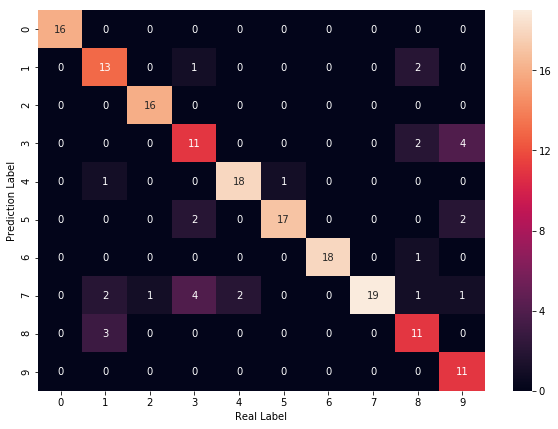

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:64 index:[5] real:5
#1 min_error:84 index:[2] real:2
#2 min_error:78 index:[1] real:8
#3 min_error:26 index:[0] real:0
#4 min_error:57 index:[1] real:1
#5 min_error:37 index:[7] real:7
#6 min_error:50 index:[6] real:6
#7 min_error:44 index:[3] real:3
#8 min_error:41 index:[2] real:2
#9 min_error:64 index:[1] real:1
#10 min_error:72 index:[7] real:7
#11 min_error:76 index:[7] real:4
#12 min_error:45 index:[6] real:6
#13 min_error:63 index:[3] real:3
#14 min_error:57 index:[1] real:1
#15 min_error:59 index:[3] real:3
#16 min_error:75 index:[7] real:9
#17 min_error:52 index:[1] real:1
#18 min_error:60 index:[7] real:7
#19 min_error:26 index:[6] real:6
#20 min_error:72 index:[8] real:8
#21 min_error:36 index:[4] real:4
#22 min_error:49 index:[3] real:3
#23 min_error:64 index:[1] real:1
#24 min_error:39 index:[4] real:4
#25 min_error:20 index:[0] real:0
#26 min_error:46 index:[5] real:5
#27 min_error:48 index:[3] real:3
#28 min_error:66 index:[6] real:6
#29 min_error:66 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8917748917748918
Avg Base Learner:0.7831292517006803


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.3
Accuracy on training set: 0.3611111111111111
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.6666666666666666
Accura

Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8222222222222222
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8277777777777777
Accuracy o

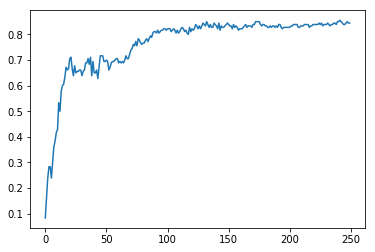

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4265 Total connections::4245
